## **MSDS 422 - Group 2 - Credit Risk Scoring**

- Exploratory Data Analysis (EDA)
- Feature Engineering


**Dataset:** `credit_risk_dataset.csv`


### **Prepared By**
- Lina El-Husseini 
- Meghna Ganesh Kumar 
- Murughanandam Sivasubramanian 
- Pravin Kumar Rajak 
- Sarfraz Nawaz

#### **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### **Read Data**

In [2]:
# Load dataset
df = pd.read_csv("data/credit_risk_dataset.csv")

#### **Feature Descriptions**

| Feature | Description |
|---------|-------------|
| **person_age** | Age of the individual applying for the loan. |
| **person_income** | Annual income of the individual. |
| **person_home_ownership** | Type of home ownership of the individual.<br>• **rent**: Currently renting.<br>• **mortgage**: Has a mortgage.<br>• **own**: Owns home outright.<br>• **other**: Other categories of home ownership. |
| **person_emp_length** | Employment length of the individual in years. |
| **loan_intent** | The intent behind the loan application. |
| **loan_grade** | Credit grade assigned to the borrower.<br>• **A**: High creditworthiness, low risk.<br>• **B**: Relatively low-risk.<br>• **C**: Moderate creditworthiness.<br>• **D**: Higher risk.<br>• **E**: Lower creditworthiness, higher risk.<br>• **F**: Significant credit risk.<br>• **G**: Lowest creditworthiness, highest risk. |
| **loan_amnt** | The loan amount requested by the individual. |
| **loan_int_rate** | The interest rate associated with the loan. |
| **loan_status** | Loan repayment status.<br>• **0 (Non-default)**: Borrower repaid successfully.<br>• **1 (Default)**: Borrower defaulted on the loan. |
| **loan_percent_income** | The percentage of income represented by the loan amount. |
| **cb_person_default_on_file** | Historical default record from credit bureau.<br>• **Y**: History of defaults.<br>• **N**: No history of defaults. |
| **cb_person_cred_hist_length** | Length of credit history for the individual. |

- The **target** variable will be `loan_status`

#### **Exploratory Data Analysis (EDA)**

We begin by analyzing the structure of the data, missing values, class distributions, and basic statistics.


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (32581, 12)


In [5]:
# Summary statistics for numerical variables
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# Missing values count
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
# Unique values count
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [9]:
# Duplicated records in the data
print("Duplicated records count:", df.duplicated().sum())

Duplicated records count: 165


There are 165 records which are duplicated and needs to be removed.

In [10]:
# Data types count
print("Number of Numerical Columns:", df.select_dtypes(include=['int64', 'float64']).shape[1])
print("Number of Categorical Columns:", df.select_dtypes(include=['object']).shape[1])

Number of Numerical Columns: 8
Number of Categorical Columns: 4


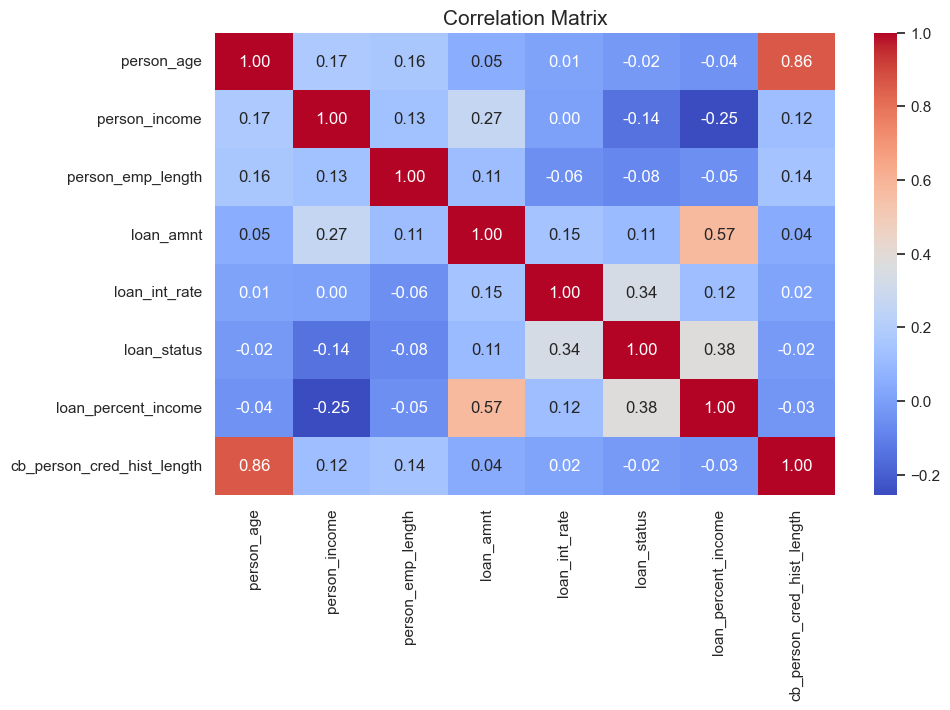

In [30]:
# Correlation matrix (only for numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot = True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=15)
plt.show()

**Univariate Analysis – Individual Features**

Maximum Age: 144 years
Minimum Age: 20 years


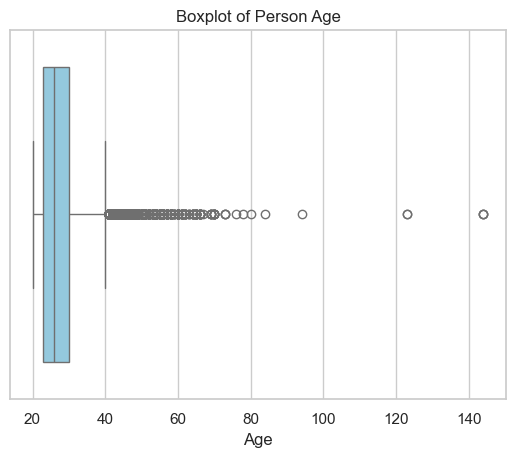

In [12]:
# MAX AND MIN AGE
print(f"Maximum Age: {df['person_age'].max()} years")
print(f"Minimum Age: {df['person_age'].min()} years")

# Boxplot on person age
sns.boxplot(x=df['person_age'], color='skyblue')
plt.title('Boxplot of Person Age')
plt.xlabel('Age')
plt.show()

The **median age** looks to be in the **early 30s**.

There are **significant outliers** beyond 60, and some extreme cases (100+, even 140) which are unrealistic and likely **data entry errors**.

In [13]:
# Define bins and labels
bins = [17, 25, 35, 45, 55, 65, 100]  # upper bound 100 to handle valid ages
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create new column for age groups
df['age_category'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=True, include_lowest=True)
df['age_category'].value_counts()

age_category
18-25    15352
26-35    13763
36-45     2814
46-55      513
56-65      104
66+         30
Name: count, dtype: int64

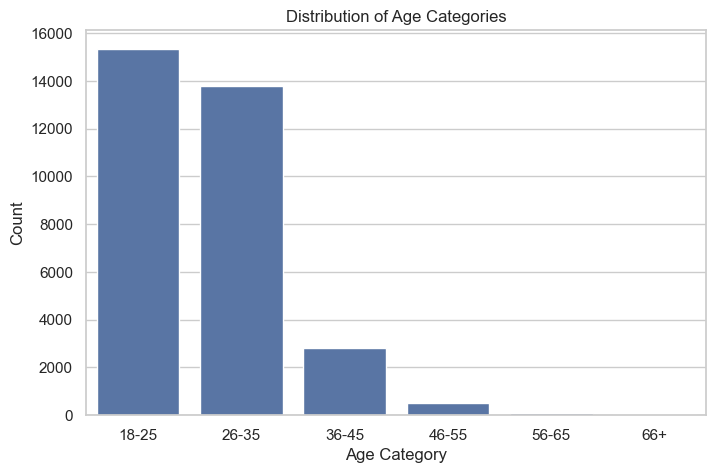

In [14]:
# Age Category Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='age_category', data=df, order=df['age_category'].value_counts().index)

plt.title("Distribution of Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()

Maximum Income: 6000000
Minimum Income: 4000
Median Income: 55000.0


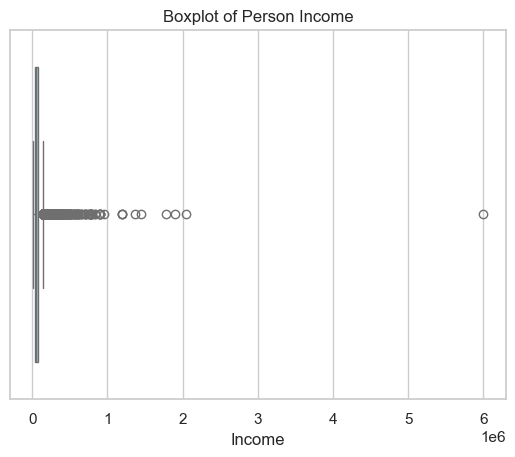

In [15]:
# MAX, MIN AND MEDIAN INCOME
print(f"Maximum Income: {df['person_income'].max()}")
print(f"Minimum Income: {df['person_income'].min()}")
print(f"Median Income: {df['person_income'].median()}")

# Boxplot on person income
sns.boxplot(x=df['person_income'], color='skyblue')
plt.title('Boxplot of Person Income')
plt.xlabel('Income')
plt.show()

In [16]:
# Define bins and labels
bins = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0-25000', '25001-50000', '50001-75000', '75001-100000', '100000+']

# Create new column for income groups
df['income_category'] = pd.cut(df['person_income'], bins=bins, labels=labels, right=True, include_lowest=True)
df['income_category'].value_counts()

income_category
25001-50000     11613
50001-75000      9622
75001-100000     4670
100000+          4207
0-25000          2469
Name: count, dtype: int64

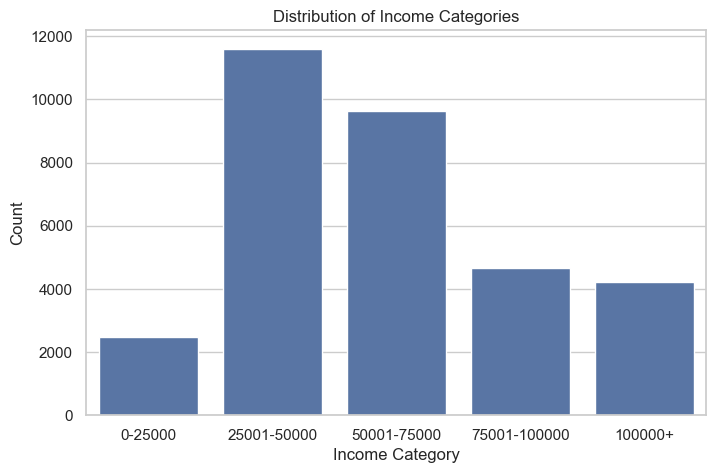

In [17]:
# Income Category Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='income_category', data=df, order=labels)

plt.title("Distribution of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

Most of the people's income lie in 25K-50K, followed by 50K-75K. The **median** turns out be **55K**.

Maximum Employment Length: 123.0 years
Minimum Employment Length: 0.0 years
Median Employment Length: 4.0 years


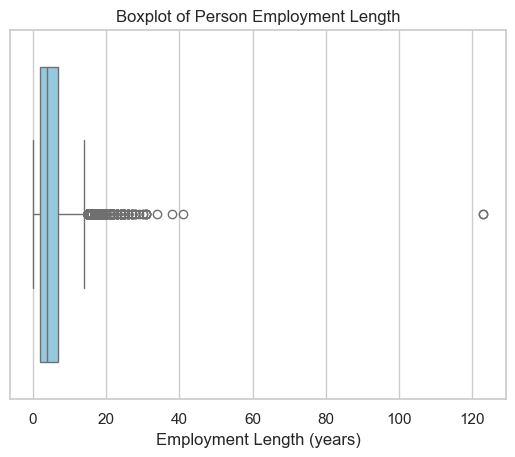

In [18]:
print(f"Maximum Employment Length: {df['person_emp_length'].max()} years")
print(f"Minimum Employment Length: {df['person_emp_length'].min()} years")
print(f"Median Employment Length: {df['person_emp_length'].median()} years")

# Boxplot on person employment length
sns.boxplot(x=df['person_emp_length'], color='skyblue')
plt.title('Boxplot of Person Employment Length')
plt.xlabel('Employment Length (years)')
plt.show()

In [19]:
# Define bins and labels
bins = [0, 4, 8, 12, 16, 20, float('inf')]
labels = ['0-4', '5-8', '9-12', '13-16', '17-20', '20+']

# Create new column for employment length groups
df['employment_length_category'] = pd.cut(df['person_emp_length'], bins=bins, labels=labels, right=True, include_lowest=True)
df['employment_length_category'].value_counts()

employment_length_category
0-4      17199
5-8       9495
9-12      3378
13-16     1164
17-20      339
20+        111
Name: count, dtype: int64

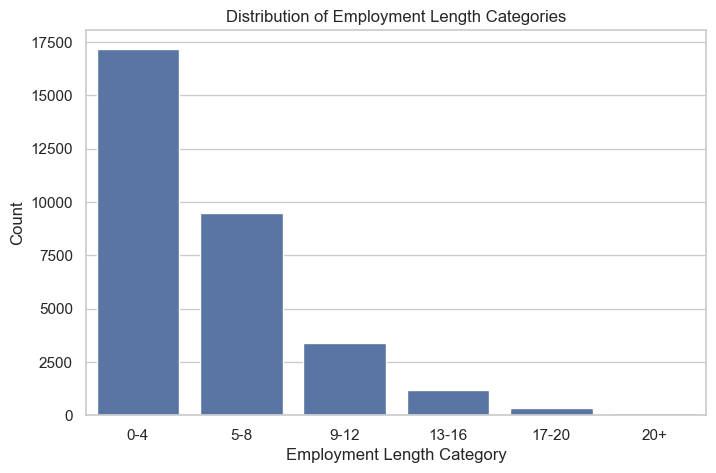

In [20]:
# Employment Length Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='employment_length_category', data=df, order=labels)

plt.title("Distribution of Employment Length Categories")
plt.xlabel("Employment Length Category")
plt.ylabel("Count")
plt.show()

Most of the people have employment length of **less than or equal to 4 years**.

<Axes: >

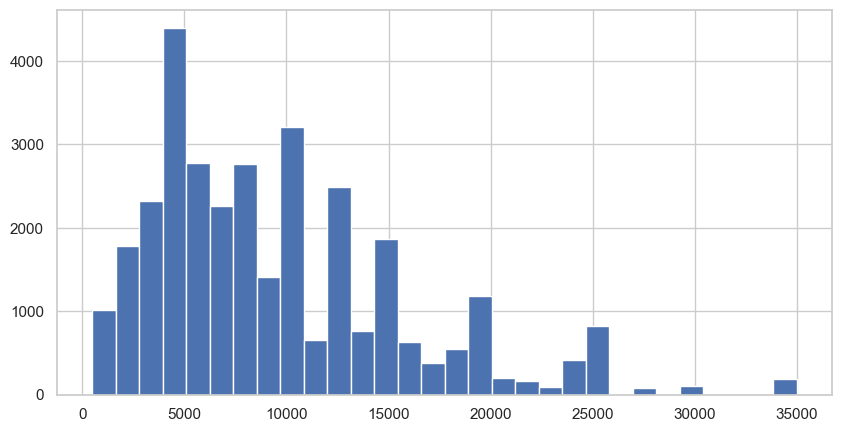

In [21]:
df['loan_amnt'].hist(figsize=(10, 5), bins=30)

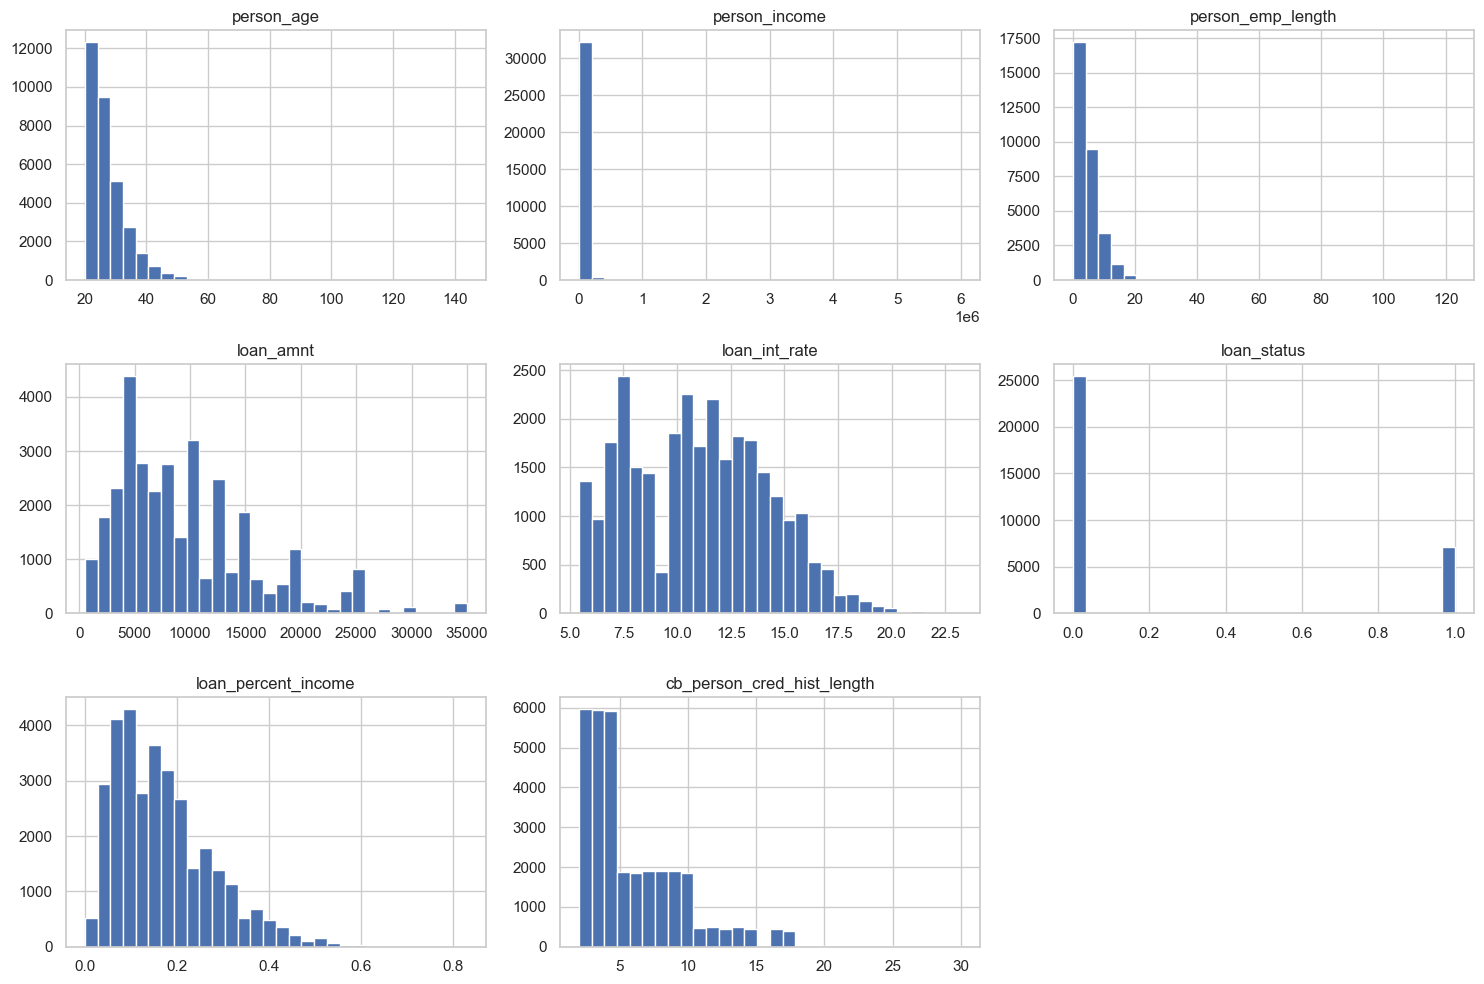

In [22]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

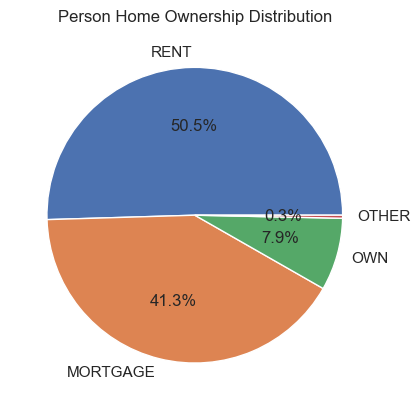

In [23]:
level_counts=df.person_home_ownership.value_counts()
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Person Home Ownership Distribution')
plt.show()

Most of the People taking a loan doesnt own their own house.

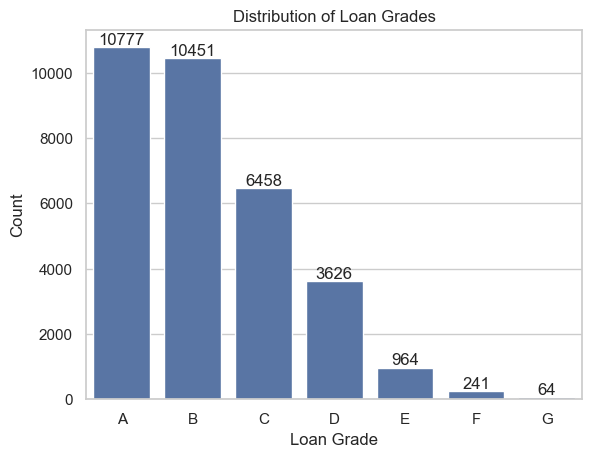

In [24]:
sns.countplot(x='loan_grade', data=df, order=df['loan_grade'].value_counts().index)
plt.title("Distribution of Loan Grades")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.bar_label(plt.gca().containers[0], label_type='edge')
plt.show()

Loan Grade A and B comprises of **65.2% of total**

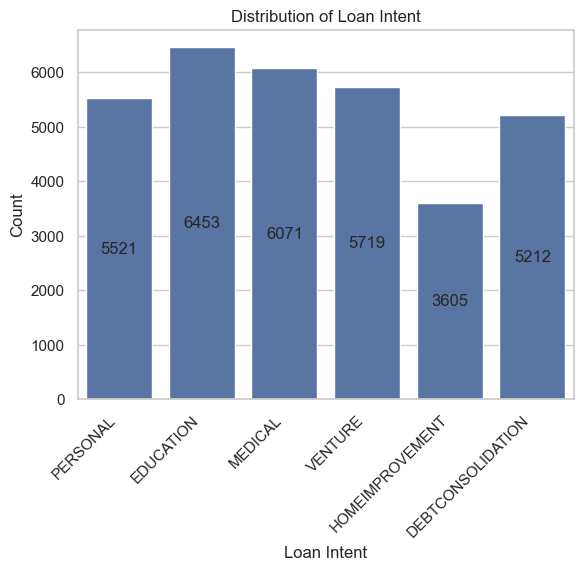

In [25]:
sns.countplot(x='loan_intent', data=df)
plt.title("Distribution of Loan Intent")
plt.xlabel("Loan Intent")
plt.bar_label(plt.gca().containers[0], label_type='center')
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

Loan Intent are equally almost distributed

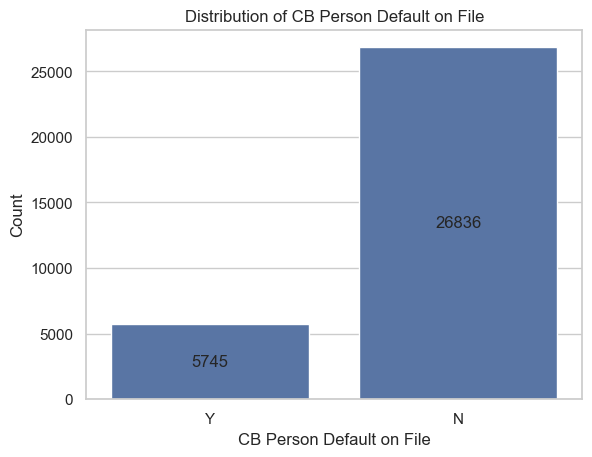

In [26]:
sns.countplot(x='cb_person_default_on_file', data=df)
plt.title("Distribution of CB Person Default on File")
plt.xlabel("CB Person Default on File")
plt.ylabel("Count")
plt.bar_label(plt.gca().containers[0], label_type='center')
plt.show()

## Bivariate Analysis – Feature vs Target

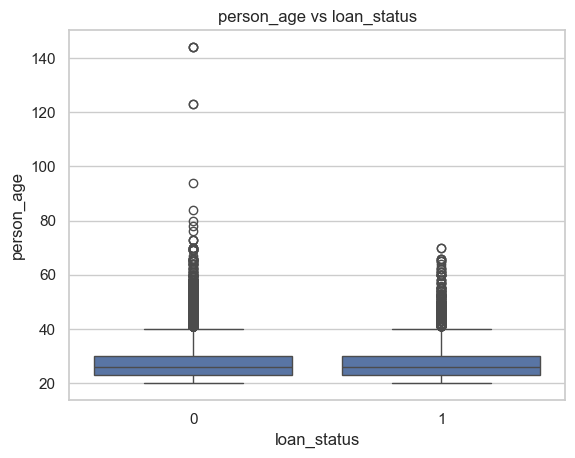

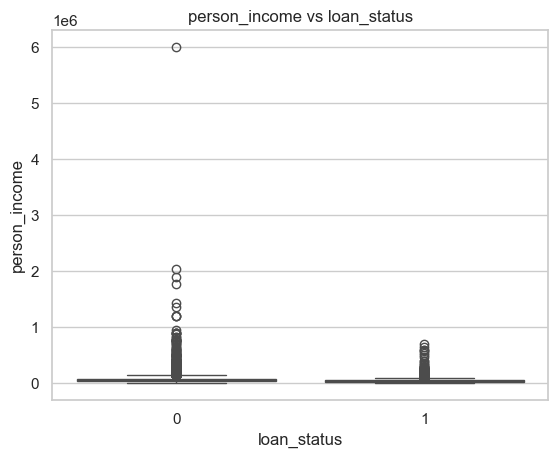

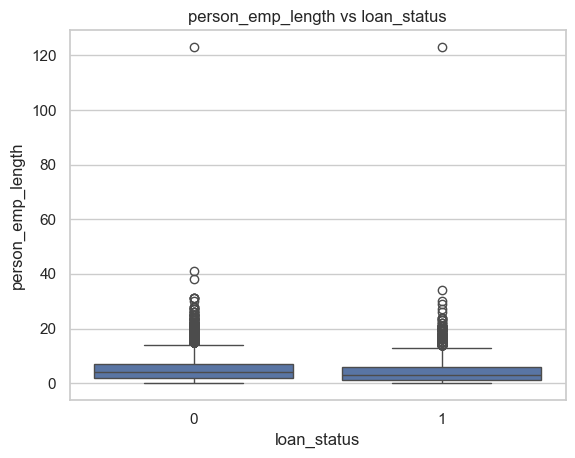

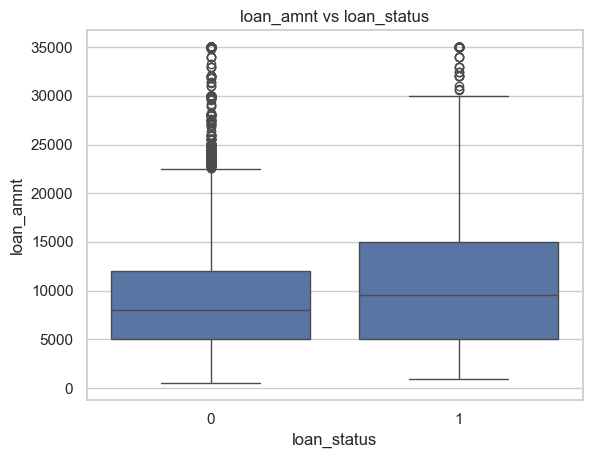

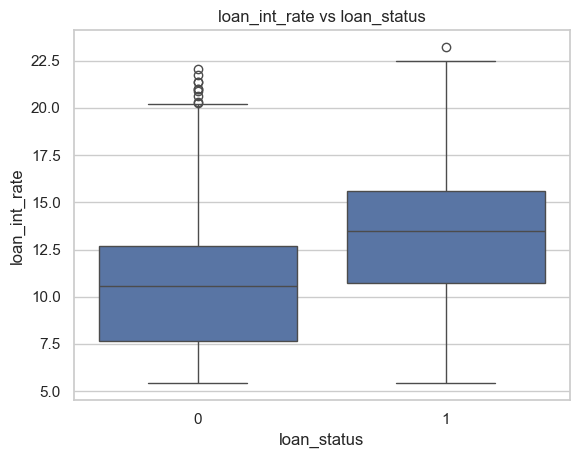

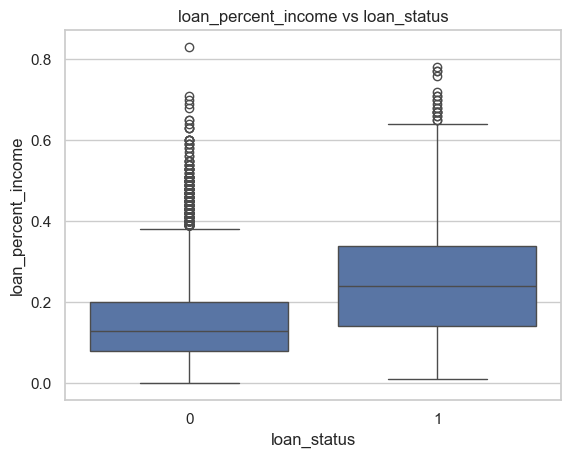

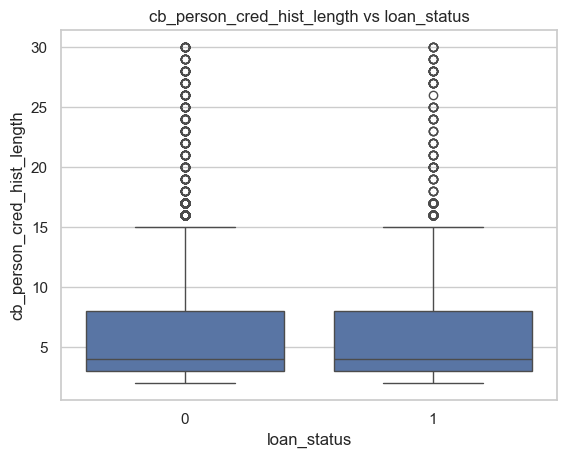

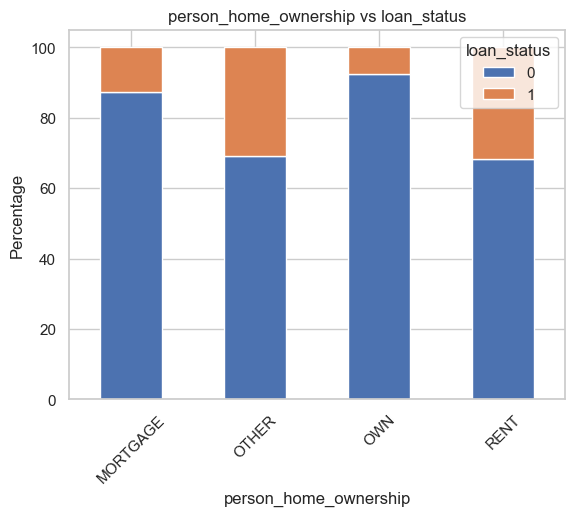

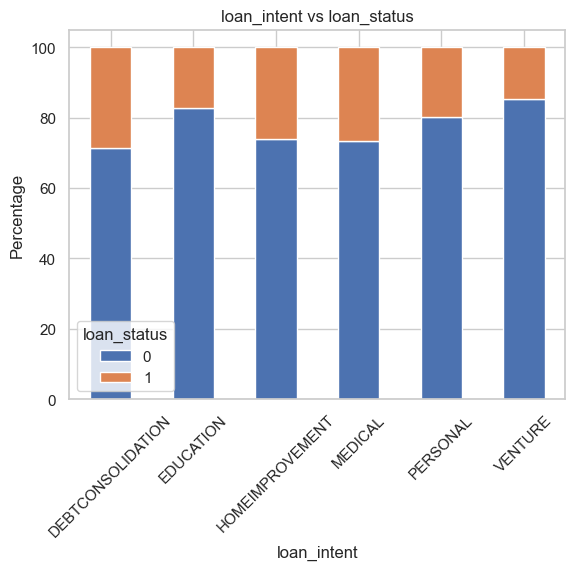

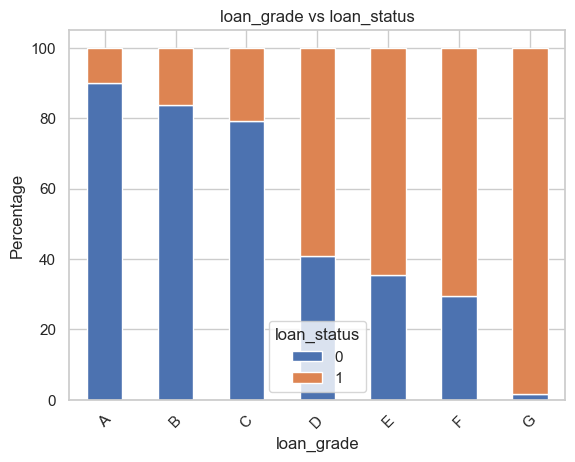

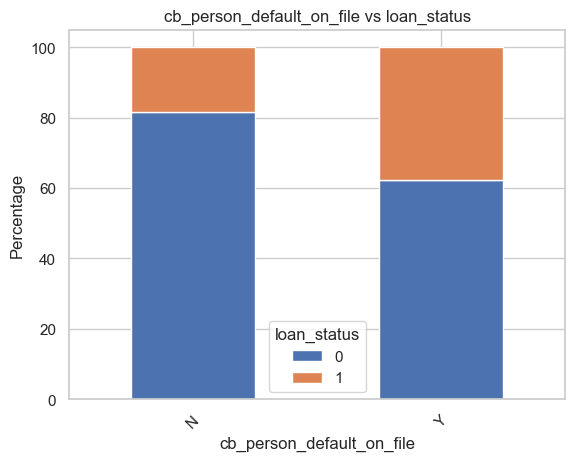

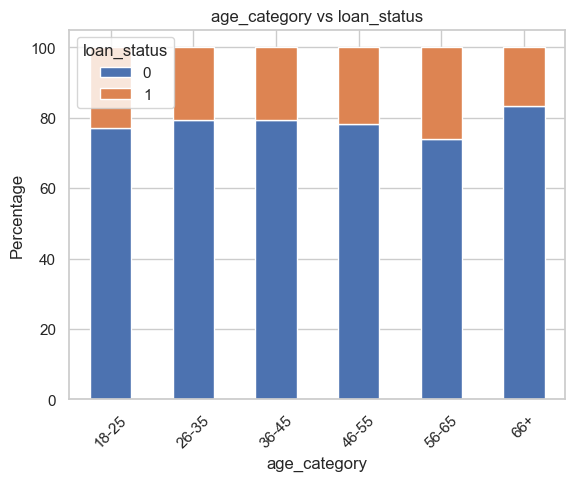

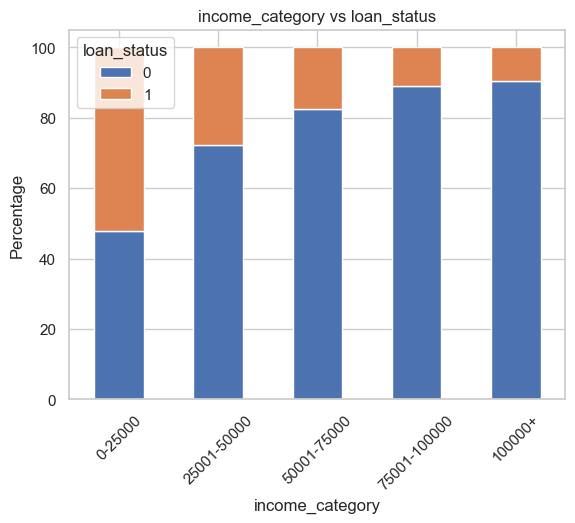

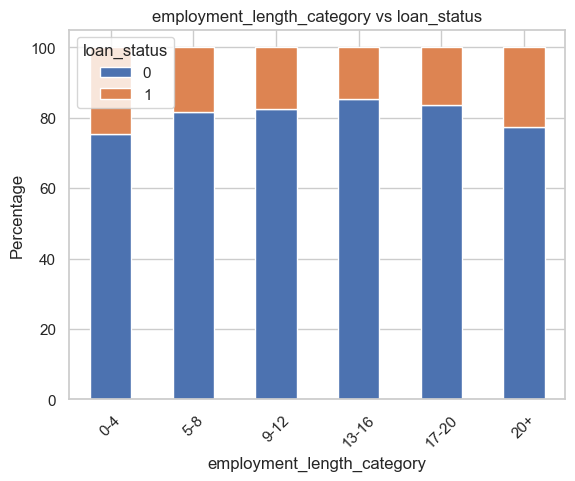

In [28]:
# Identify target variable
target = 'loan_status'

# Numerical feature vs target (boxplots)
numerical_cols = df.select_dtypes(include=np.number).columns.drop(target, errors='ignore')
for col in numerical_cols:
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} vs {target}')
    plt.show()

# Identify categorical columns (excluding the target)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop(target, errors='ignore')

# Categorical feature vs target (stacked bar chart)
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df[target], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs {target}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

## Feature Interactions

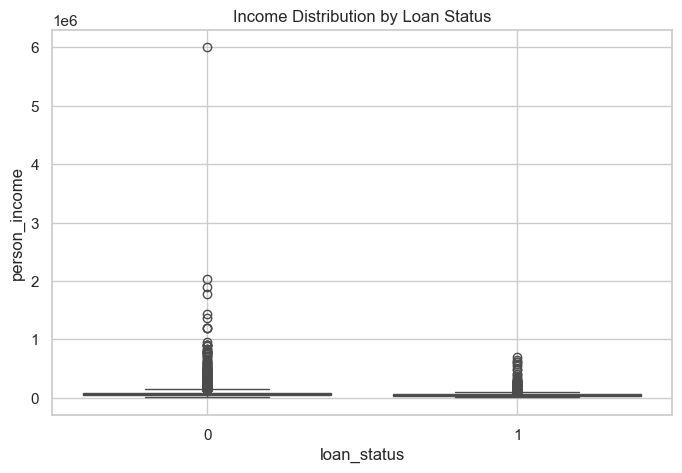

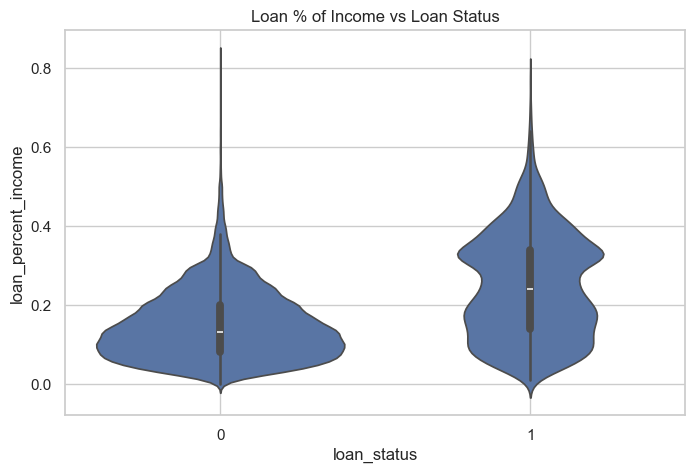

In [31]:
# Bivariate plots to explore feature interactions
# Relationship between income and default
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Income Distribution by Loan Status')
plt.grid(True)
plt.show()

# Loan percent income vs loan_status
plt.figure(figsize=(8, 5))
sns.violinplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Loan % of Income vs Loan Status')
plt.grid(True)
plt.show()


## 2.Data Preparation and Feature Engineering

In [ ]:
# Feature Engineering

# 1. Create debt-to-income ratio if applicable
if 'person_income' in df.columns and 'loan_amnt' in df.columns:
    df['income_to_loan_ratio'] = df['person_income'] / (df['loan_amnt'] + 1)

# 2. Bucket employment length
def emp_length_bin(x):
    if pd.isna(x):
        return 'Unknown'
    elif x <= 2:
        return '0–2yrs'
    elif x <= 7:
        return '3–7yrs'
    elif x <= 20:
        return '7–20yrs'
    else:
        return '20yrs+'

if 'person_emp_length' in df.columns:
    df['emp_length_bin'] = df['person_emp_length'].apply(emp_length_bin)

# 3. Drop or fill missing values in critical columns
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# Display updated DataFrame info
df.info()


###  Encode Categorical Variables

In [ ]:
# Encode Categorical Variables
categorical_cols = ['loan_grade', 'loan_intent', 'person_home_ownership', 'cb_person_default_on_file', 'emp_length_bin']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


#### Define Features and Target

In [ ]:
# Display current columns
print("All columns in DataFrame:")
print(df.columns.tolist())

# Identify categorical columns safely
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nIdentified Categorical Columns:")
print(categorical_cols)

# Show missing value summary before processing
print("\nMissing Values (Before Filling):")
print(df[categorical_cols].isna().sum()[df[categorical_cols].isna().sum() > 0])

# Fill missing values with mode safely
for col in categorical_cols:
    if col in df.columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)
            print(f"Filled missing values in '{col}' with mode: {mode_value[0]}")
        else:
            print(f"No mode found for column: {col} — skipped")
    else:
        print(f"Column '{col}' not found in DataFrame — skipped")

# Confirm if all missing values are handled
print("\nMissing Values (After Filling):")
print(df[categorical_cols].isna().sum()[df[categorical_cols].isna().sum() > 0])



In [ ]:
# Define features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Check class distribution
y.value_counts(normalize=True)


## PCA
- Apply PCA for dimensionality reduction and visualize variance explained.

In [ ]:

# Assuming you already have your original features in a DataFrame called X
# Add interaction features
X['income_x_credit_length'] = X['person_income'] * X['cb_person_cred_hist_length']
X['loan_percent_squared'] = X['loan_percent_income'] ** 2

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply PCA to full scaled data
pca_full = PCA()
pca_full.fit(X_scaled_df)

# Compute cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.title('PCA - Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Determine number of components that explain at least 95% of variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain (≥95% variance): {n_components_95}")


## Elbow method to find optimal k

In [ ]:
pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X_scaled_df)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Elbow method to find optimal number of clusters (k)
inertia = []
k_range = range(1, 15)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca_df)
    inertia.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

## Train-Test Split and Scaling

In [ ]:
# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Standard scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Summary

We have done a comprehensive data analysis pipeline for a credit risk dataset consisting of loan applicants. The primary goal is to understand the factors influencing loan default (loan_status) and prepare the data for downstream predictive modeling. The process involves exploratory data analysis (EDA), feature engineering, dimensionality reduction using PCA, and borrower segmentation using K-Means clustering.

1. Data Loading and Overview

We loadeded the dataset using pandas.read_csv().
To inspect the structure, shape, and first few entries of the data to get a sense of its quality and composition.
The dataset contains 32,581 entries and 12 variables, a mix of numeric and categorical features. The unit of analysis is the individual loan application. Variables like person_income, loan_amnt, and loan_status are central to this analysis.

2. Missing Values and Data Types

We inspected missing values using .isnull().sum() and review variable types using .info().
To detect incomplete or improperly formatted data, which may require imputation or cleaning.
Only the person_emp_length column has missing values (13 instances). Categorical variables are encoded as object, suitable for one-hot encoding later.

3. Exploratory Data Analysis (EDA)

We used .describe(), histograms, box plots, violin plots, and count plots to summarize key variables and compare distributions across loan_status.
To identify potential patterns, outliers, or correlations and uncover relationships that may influence defaults.

Default rates are higher for applicants with lower income and higher loan-to-income ratios.

Most loans are taken for personal or medical reasons.

There are clear distributional differences in income and loan amounts between defaulters and non-defaulters.

4. Feature Engineering

We created new features like loan_percent_income, income_to_loan_ratio, income_x_credit_length, and loan_percent_squared. Employment length is binned.
To expose hidden relationships and interactions between variables, improve model input quality, and capture non-linear effects.
These features normalize or enhance raw variables. For example, loan_percent_income gives context to the affordability of loans, which is more informative than raw amounts.

5. Data Encoding and Scaling

We one-hot encoded categorical variables and scale all numeric features using StandardScaler.
Machine learning models, especially PCA and K-Means, require numeric, standardized inputs to ensure fair distance calculations and convergence.
Encoded variables increase the dimensionality but make the data model-compatible. Scaling ensures that no single feature dominates due to its range.

6. Correlation Matrix

We computed and visualized the Pearson correlation matrix using a heatmap.
To understand linear relationships between numerical features and detect redundancy or strong predictors.
Loan amount and income are moderately correlated. Engineered features like loan_percent_income and income_to_loan_ratio are negatively correlated, as expected.

7. Principal Component Analysis (PCA)

We appllied PCA on the scaled dataset and generate cumulative variance plots to select the number of components.
To reduce feature space dimensionality, improve computational efficiency, and remove multicollinearity.
The scree plot indicates that the first 10 components explain over 95% of the variance. PCA transforms correlated features into orthogonal axes, improving model robustness.

8. Interaction Terms

We added interaction and squared terms to model potential nonlinear effects and joint influences.
To improve expressiveness of the dataset for linear models and capture synergistic effects of multiple features.
Features like income_x_credit_length help combine economic capacity with credit history, which may better differentiate borrower profiles.

9. K-Means Clustering

We used KMeans to segment borrowers into behavioral clusters and use the elbow method to select the best k.
To discover underlying borrower segments based on financial and demographic similarity, useful for targeting and risk profiling.
The elbow plot suggests 4–6 clusters as optimal. Clusters likely separate low-risk and high-risk applicants, which can be incorporated into model features or business strategies.

Summary

We have successfully prepared the credit risk dataset for modeling by executing a well-structured pipeline. Through data inspection, enrichment, scaling, dimensionality reduction, and clustering, the data is now clean, informative, and ready for predictive modeling. Next steps could involve training classifiers (e.g., logistic regression, random forest etc) and evaluating their performance using metrics like F1-score and ROC-AUC.